# DSR - Deep Learning from Scratch  - Day 1
Welcome! During the following two days you will be working on this Python package. You will be asked to make some changes in the package code as well in this notebook, thanks to importlib you just have to do `Kernel -> Restart and Run All` to see how your changes in action.

In [1]:
import johnny_deep

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)
reload(johnny_deep.optimizers)

<module 'johnny_deep.optimizers' from '/Users/marco/Area51/johnny_deep/johnny_deep/optimizers.py'>

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

We will use the `make_moons` dataset as a toy example, it will have very few sample but it's non linear enough to make the workshop interesting.

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(n_samples=1000, noise=0.10, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()
del X, Y

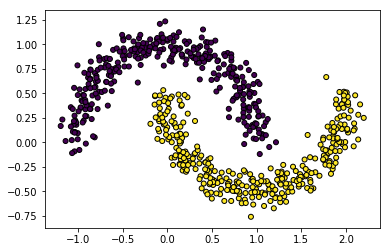

In [5]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [6]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
    {"dimension": 10, "type": "tanh"},
    {"dimension": 10, "type": "tanh"},
    {"dimension": 1, "type": "sigmoid"},
]

In [7]:
m = johnny_deep.models.Model(nn_architecture)
optimizer = johnny_deep.optimizers.GradientDescent(learning_rate=0.3)
theta = m.fit(X_train, Y_train, optimizer, no_of_epochs=2000, gradient_check_every=None, print_every=100)

Layer 1: tanh dimension 10
W shape: (10, 2)
b shape: (10, 1)
Layer 2: tanh dimension 10
W shape: (10, 10)
b shape: (10, 1)
Layer 3: sigmoid dimension 1
W shape: (1, 10)
b shape: (1, 1)
Epoch 0, cost: 0.69339295322883
Epoch 100, cost: 0.26171261484774433
Epoch 200, cost: 0.2567945508663077
Epoch 300, cost: 0.2548376096680912
Epoch 400, cost: 0.25359679595690177
Epoch 500, cost: 0.2527466244268087
Epoch 600, cost: 0.2521277172456978
Epoch 700, cost: 0.2516537979612419
Epoch 800, cost: 0.2512721871711845
Epoch 900, cost: 0.25094167190810757
Epoch 1000, cost: 0.25060075726445635
Epoch 1100, cost: 0.2500063185205215
Epoch 1200, cost: 0.24639028301724003
Epoch 1300, cost: 0.13671410388911698
Epoch 1400, cost: 0.03955385461407309
Epoch 1500, cost: 0.022227529356347666
Epoch 1600, cost: 0.015621155055915284
Epoch 1700, cost: 0.01208408031009991
Epoch 1800, cost: 0.009848254852023374
Epoch 1900, cost: 0.008295984265581965
Epoch 2000, cost: 0.007153469181876615


In [8]:
Y_hat = m.forward(theta, X_test)

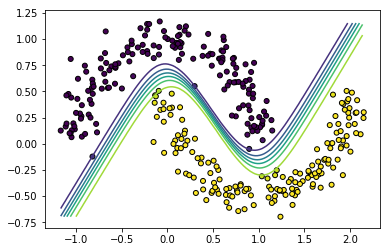

In [9]:
johnny_deep.utils.plot_with_countours(plt, X_test, Y_hat, m, theta)